# SpikeInterface Advanced Tutorial - April 2022

## SpikeInterface Hidden Features


### Topics

1. ProbeInterface: probe handling and more
2. Working with segments and recordings
3. Lazy processing explained
4. WaveformExtractor and WaveformExtractorExtension
5. Parallelization - working with job tools
6. Save formats: binary / zarr / memory

## 1) ProbeInterface: probe handling and more


[`ProbeInterface`](https://github.com/SpikeInterface/probeinterface) is a SpikeInterface twin project to abstract and describe probe objects (you can read more about it [here](https://doi.org/10.3389/fninf.2022.823056)).

It provides several ways to create, read, and download probe information. It goes without saying...it nicely integrates with SpikeInterface! 

Here's how:

In [1]:
import spikeinterface.full as si
import probeinterface as pi

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import time

%matplotlib widget

/home/alessio/anaconda3/envs/si/lib/python3.9/site-packages/datalad/cmd.py:375: RuntimeWarning: coroutine 'run_async_cmd' was never awaited
  new_loop = True
/home/alessio/Documents/codes/spike_sorting/spikeinterface/spikeinterface/spikeinterface/core/datasets.py:12: RuntimeWarning: coroutine 'run_async_cmd' was never awaited
  HAVE_DATALAD = False


In [90]:
# cleanup
!rm -r mearec_wf/ mearec_wf_selected/ binary_format/ zarr_format_default.zarr/ zarr_format_custom.zarr/ npz_fomat/

### 1.1 Create a probe from scratch

In [2]:
num_channels = 32

positions = np.zeros((num_channels, 2))
radius = 100
for i in range(num_channels):
    theta = i / num_channels * 2*np.pi 
    x = np.cos(theta) * radius
    y = np.sin(theta) * radius
    positions[i] = [x, y]
    
probe = pi.Probe(ndim=2)

In [3]:
probe.set_contacts(positions, shapes="rect", shape_params={"width": 4, "height": 10})
probe.set_contact_ids([f"Ch{i}" for i in range(num_channels)])
probe.create_auto_shape()

(<matplotlib.collections.PolyCollection at 0x7f358745bf10>,
 <matplotlib.collections.PolyCollection at 0x7f35873d0a30>)

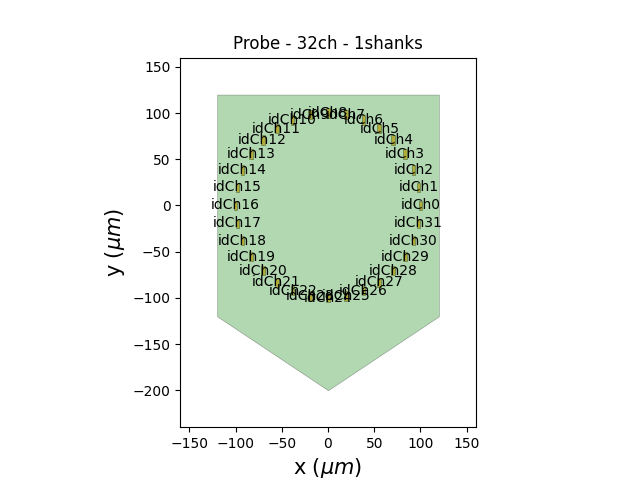

In [4]:
pi.plotting.plot_probe(probe, with_contact_id=True)

In [5]:
probe.to_dataframe(complete=True)

,x,y,contact_shapes,width,height,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,1.000000e+02,0.000000e+00,rect,4.0,10.0,,Ch0,-1,um,1.0,0.0,0.0,1.0
1,9.807853e+01,1.950903e+01,rect,4.0,10.0,,Ch1,-1,um,1.0,0.0,0.0,1.0
2,9.238795e+01,3.826834e+01,rect,4.0,10.0,,Ch2,-1,um,1.0,0.0,0.0,1.0
3,8.314696e+01,5.555702e+01,rect,4.0,10.0,,Ch3,-1,um,1.0,0.0,0.0,1.0
4,7.071068e+01,7.071068e+01,rect,4.0,10.0,,Ch4,-1,um,1.0,0.0,0.0,1.0
5,5.555702e+01,8.314696e+01,rect,4.0,10.0,,Ch5,-1,um,1.0,0.0,0.0,1.0
6,3.826834e+01,9.238795e+01,rect,4.0,10.0,,Ch6,-1,um,1.0,0.0,0.0,1.0
7,1.950903e+01,9.807853e+01,rect,4.0,10.0,,Ch7,-1,um,1.0,0.0,0.0,1.0
8,6.123234e-15,1.000000e+02,rect,4.0,10.0,,Ch8,-1,um,1.0,0.0,0.0,1.0
9,-1.950903e+01,9.807853e+01,rect,4.0,10.0,,Ch9,-1,um,1.0,0.0,0.0,1.0


### Load probe to recording

In [6]:
rec, _ = si.toy_example(num_channels=num_channels)

In [7]:
rec = rec.set_probe(probe)

AssertionError: Probe must have device_channel_indices

We have to add the wiring!!!

In [8]:
probe.set_device_channel_indices(np.random.permutation(num_channels))

In [9]:
probe.to_dataframe(complete=True)

,x,y,contact_shapes,width,height,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,1.000000e+02,0.000000e+00,rect,4.0,10.0,,Ch0,1,um,1.0,0.0,0.0,1.0
1,9.807853e+01,1.950903e+01,rect,4.0,10.0,,Ch1,8,um,1.0,0.0,0.0,1.0
2,9.238795e+01,3.826834e+01,rect,4.0,10.0,,Ch2,29,um,1.0,0.0,0.0,1.0
3,8.314696e+01,5.555702e+01,rect,4.0,10.0,,Ch3,28,um,1.0,0.0,0.0,1.0
4,7.071068e+01,7.071068e+01,rect,4.0,10.0,,Ch4,5,um,1.0,0.0,0.0,1.0
5,5.555702e+01,8.314696e+01,rect,4.0,10.0,,Ch5,11,um,1.0,0.0,0.0,1.0
6,3.826834e+01,9.238795e+01,rect,4.0,10.0,,Ch6,0,um,1.0,0.0,0.0,1.0
7,1.950903e+01,9.807853e+01,rect,4.0,10.0,,Ch7,3,um,1.0,0.0,0.0,1.0
8,6.123234e-15,1.000000e+02,rect,4.0,10.0,,Ch8,24,um,1.0,0.0,0.0,1.0
9,-1.950903e+01,9.807853e+01,rect,4.0,10.0,,Ch9,14,um,1.0,0.0,0.0,1.0


In [10]:
rec.set_probe(probe, in_place=True)

NumpyRecording: 32 channels - 2 segments - 30.0kHz - 20.000s

In [11]:
probe_loaded = rec.get_probe()
probe_loaded.to_dataframe(complete=True)

,x,y,contact_shapes,width,height,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,3.826834e+01,9.238795e+01,rect,4.0,10.0,,Ch6,0,um,1.0,0.0,0.0,1.0
1,1.000000e+02,0.000000e+00,rect,4.0,10.0,,Ch0,1,um,1.0,0.0,0.0,1.0
2,-9.807853e+01,-1.950903e+01,rect,4.0,10.0,,Ch17,2,um,1.0,0.0,0.0,1.0
3,1.950903e+01,9.807853e+01,rect,4.0,10.0,,Ch7,3,um,1.0,0.0,0.0,1.0
4,1.950903e+01,-9.807853e+01,rect,4.0,10.0,,Ch25,4,um,1.0,0.0,0.0,1.0
5,7.071068e+01,7.071068e+01,rect,4.0,10.0,,Ch4,5,um,1.0,0.0,0.0,1.0
6,-7.071068e+01,-7.071068e+01,rect,4.0,10.0,,Ch20,6,um,1.0,0.0,0.0,1.0
7,9.807853e+01,-1.950903e+01,rect,4.0,10.0,,Ch31,7,um,1.0,0.0,0.0,1.0
8,9.807853e+01,1.950903e+01,rect,4.0,10.0,,Ch1,8,um,1.0,0.0,0.0,1.0
9,3.826834e+01,-9.238795e+01,rect,4.0,10.0,,Ch26,9,um,1.0,0.0,0.0,1.0


`device_channel_indices` are internally sorted!

In [12]:
rec.get_channel_ids()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

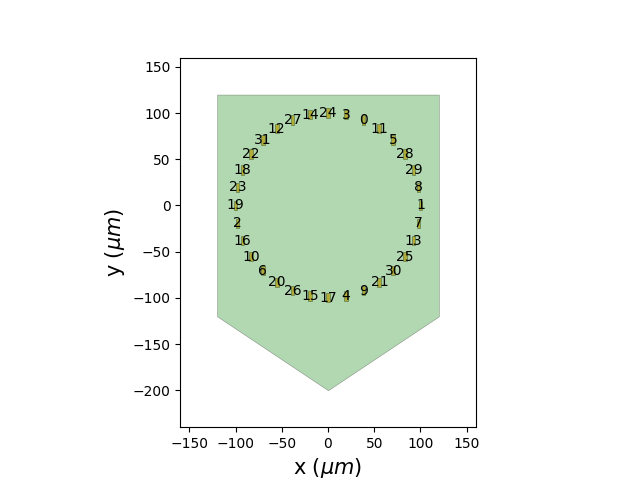

In [13]:
si.plot_probe_map(rec, with_channel_ids=True)

In [14]:
rec.get_property("contact_vector")

array([(0,  3.82683432e+01,  9.23879533e+01, 'rect', 4., 10., '', 'Ch6',  0, 'um', 1., 0., 0., 1.),
       (0,  1.00000000e+02,  0.00000000e+00, 'rect', 4., 10., '', 'Ch0',  1, 'um', 1., 0., 0., 1.),
       (0, -9.80785280e+01, -1.95090322e+01, 'rect', 4., 10., '', 'Ch17',  2, 'um', 1., 0., 0., 1.),
       (0,  1.95090322e+01,  9.80785280e+01, 'rect', 4., 10., '', 'Ch7',  3, 'um', 1., 0., 0., 1.),
       (0,  1.95090322e+01, -9.80785280e+01, 'rect', 4., 10., '', 'Ch25',  4, 'um', 1., 0., 0., 1.),
       (0,  7.07106781e+01,  7.07106781e+01, 'rect', 4., 10., '', 'Ch4',  5, 'um', 1., 0., 0., 1.),
       (0, -7.07106781e+01, -7.07106781e+01, 'rect', 4., 10., '', 'Ch20',  6, 'um', 1., 0., 0., 1.),
       (0,  9.80785280e+01, -1.95090322e+01, 'rect', 4., 10., '', 'Ch31',  7, 'um', 1., 0., 0., 1.),
       (0,  9.80785280e+01,  1.95090322e+01, 'rect', 4., 10., '', 'Ch1',  8, 'um', 1., 0., 0., 1.),
       (0,  3.82683432e+01, -9.23879533e+01, 'rect', 4., 10., '', 'Ch26',  9, 'um', 1., 0., 0., 

Now when we slice the recording, the probe is also sliced accordingly:

[ 0  4  8 12 16 20 24 28]


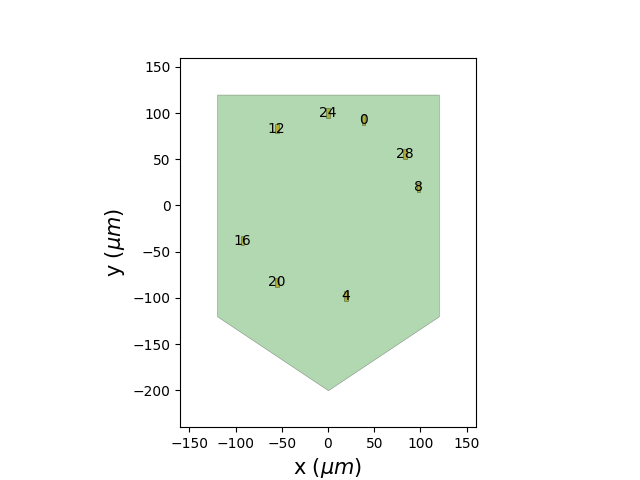

In [15]:
rec_slice = rec.channel_slice(channel_ids=rec.channel_ids[::4])
print(rec_slice.channel_ids)

si.plot_probe_map(rec_slice, with_channel_ids=True)

### 1.2 Download probe from probe library

We can also download probes from the [probeinterface library](https://gin.g-node.org/spikeinterface/probeinterface_library)


First let's get the binary data from [Zenodo](https://zenodo.org/record/4657314) and load the recording:

In [16]:
# file path
recording_file = 'cambridge_data.bin'

# parameters to load the bin/dat format
num_channels = 64
sampling_frequency = 20000
gain_to_uV = 0.195
offset_to_uV = 0
dtype="int16"
time_axis = 1

In [17]:
recording_cambridge = si.read_binary(recording_file, num_chan=num_channels, sampling_frequency=sampling_frequency,
                                     dtype=dtype, gain_to_uV=gain_to_uV, offset_to_uV=offset_to_uV, 
                                     time_axis=time_axis)


In [18]:
manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-156-P-1'

probe_cambridge = pi.get_probe(manufacturer, probe_name)
print(probe_cambridge)

cambridgeneurotech - ASSY-156-P-1 - 64ch - 4shanks


For the wiring, we can use automatic pathways that describe several widely used connectors + headstages:

In [19]:
probe_cambridge.to_dataframe(complete=True)

,x,y,contact_shapes,width,height,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,522.5,137.5,rect,11.0,15.0,2,1,-1,um,1.0,0.0,0.0,1.0
1,500.0,50.0,rect,11.0,15.0,2,2,-1,um,1.0,0.0,0.0,1.0
2,522.5,187.5,rect,11.0,15.0,2,3,-1,um,1.0,0.0,0.0,1.0
3,500.0,125.0,rect,11.0,15.0,2,4,-1,um,1.0,0.0,0.0,1.0
4,772.5,112.5,rect,11.0,15.0,3,5,-1,um,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,772.5,37.5,rect,11.0,15.0,3,60,-1,um,1.0,0.0,0.0,1.0
60,750.0,150.0,rect,11.0,15.0,3,61,-1,um,1.0,0.0,0.0,1.0
61,750.0,50.0,rect,11.0,15.0,3,62,-1,um,1.0,0.0,0.0,1.0
62,750.0,125.0,rect,11.0,15.0,3,63,-1,um,1.0,0.0,0.0,1.0


In [20]:
pi.get_available_pathways()

['H32>RHD2132',
 'ASSY-156>RHD2164',
 'ASSY-77>Adpt.A64-Om32_2x-sm>RHD2164',
 'cambridgeneurotech_mini-amp-64']

In [21]:
probe_cambridge.wiring_to_device('ASSY-156>RHD2164')
probe_cambridge.to_dataframe(complete=True)

,x,y,contact_shapes,width,height,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,522.5,137.5,rect,11.0,15.0,2,1,47,um,1.0,0.0,0.0,1.0
1,500.0,50.0,rect,11.0,15.0,2,2,46,um,1.0,0.0,0.0,1.0
2,522.5,187.5,rect,11.0,15.0,2,3,45,um,1.0,0.0,0.0,1.0
3,500.0,125.0,rect,11.0,15.0,2,4,44,um,1.0,0.0,0.0,1.0
4,772.5,112.5,rect,11.0,15.0,3,5,43,um,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,772.5,37.5,rect,11.0,15.0,3,60,52,um,1.0,0.0,0.0,1.0
60,750.0,150.0,rect,11.0,15.0,3,61,51,um,1.0,0.0,0.0,1.0
61,750.0,50.0,rect,11.0,15.0,3,62,50,um,1.0,0.0,0.0,1.0
62,750.0,125.0,rect,11.0,15.0,3,63,49,um,1.0,0.0,0.0,1.0


(<matplotlib.collections.PolyCollection at 0x7f357e98a4f0>,
 <matplotlib.collections.PolyCollection at 0x7f357e9e18e0>)

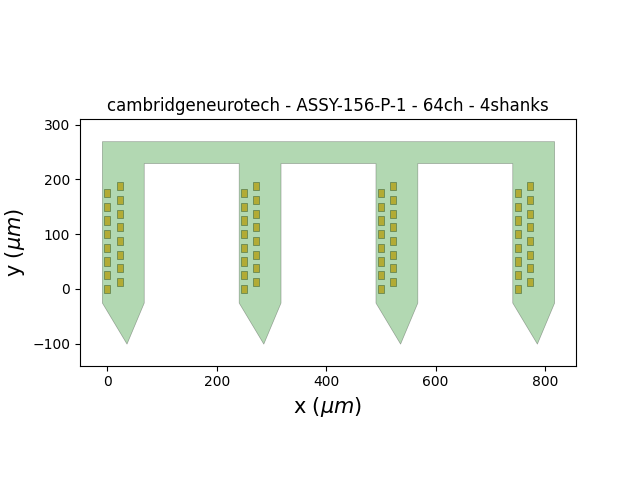

In [22]:
pi.plotting.plot_probe(probe_cambridge)

In [23]:
recording_cambridge.set_probe(probe_cambridge, group_mode="by_shank", in_place=True)

BinaryRecordingExtractor: 64 channels - 1 segments - 20.0kHz - 600.000s
  file_paths: ['/home/alessio/Documents/codes/spike_sorting/spikeinterface/spiketutorials/Advanced_Tutorial_SI_0.94_Apr2021/cambridge_data.bin']

In [24]:
recording_cambridge.get_channel_groups()

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 1, 2])

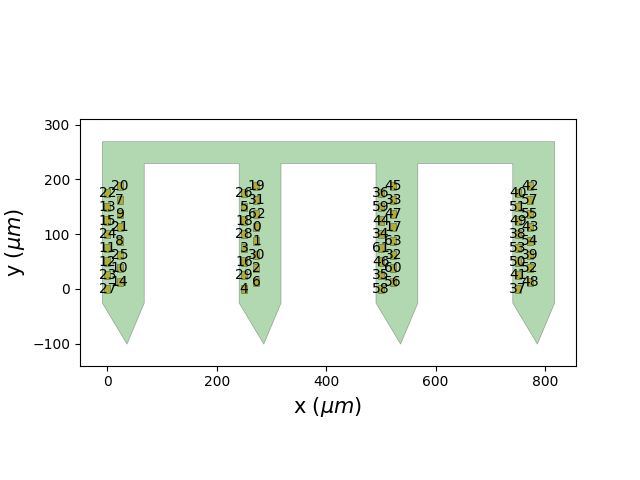

In [25]:
si.plot_probe_map(recording_cambridge, with_channel_ids=True)

We can now easily split the recording by groups:

In [26]:
rec_split = recording_cambridge.split_by("group")
print(rec_split)

{0: ChannelSliceRecording: 16 channels - 1 segments - 20.0kHz - 600.000s, 1: ChannelSliceRecording: 16 channels - 1 segments - 20.0kHz - 600.000s, 2: ChannelSliceRecording: 16 channels - 1 segments - 20.0kHz - 600.000s, 3: ChannelSliceRecording: 16 channels - 1 segments - 20.0kHz - 600.000s}


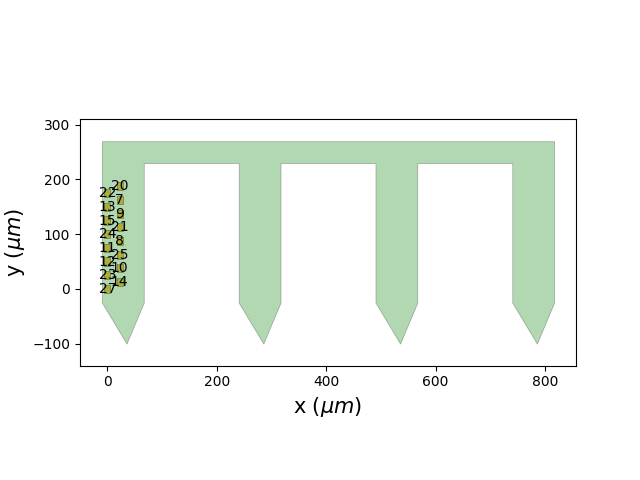

In [27]:
si.plot_probe_map(rec_split[0], with_channel_ids=True)

### 1.3 Automatically load the probe object


Several SI `read_***` functions automatically use `probeinterface` to load the respective probe. 

These include:

- SpikeGLX
- Open Ephys (only using Neuropix-PXI plugin)
- MEArec
- Maxwell
- 3Brain
- NWB

Let's see some examples from the [GIN ephy_testing_data](https://gin.g-node.org/NeuralEnsemble/ephy_testing_data) library:

In [28]:
local_ephy_data = Path("/home/alessio/Documents/data/gin/ephy_testing_data")

spikeglx1_folder = local_ephy_data / "spikeglx" / "Noise4Sam_g0"
spikeglx2_folder = Path("/home/alessio/Documents/data/spikeglx/np2/M136_2021_12_06")

oe_npix1_folder = Path("/home/alessio/Documents/data/allen/npix-open-ephys/605068_2022-02-28_17-00-14/")
oe_npix2_folder = Path("/home/alessio/Documents/data/allen/npix-open-ephys/595262_2022-02-21_15-18-07")


mearec_file = local_ephy_data / "mearec" / "mearec_test_10s.h5"

maxwell_file = local_ephy_data / "maxwell" / "MaxOne_data/Network/000010/data.raw.h5"

threebrain_file = local_ephy_data / "biocam" / "biocam_hw3.0_fw1.6.brw"

Text(0.5, 1.0, '3Brain - Biocam')

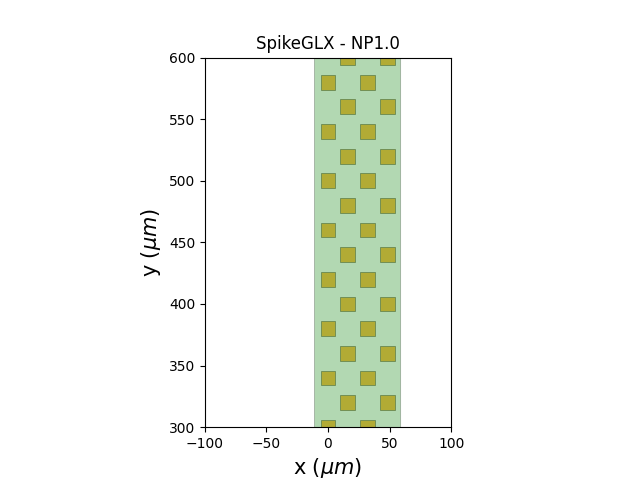

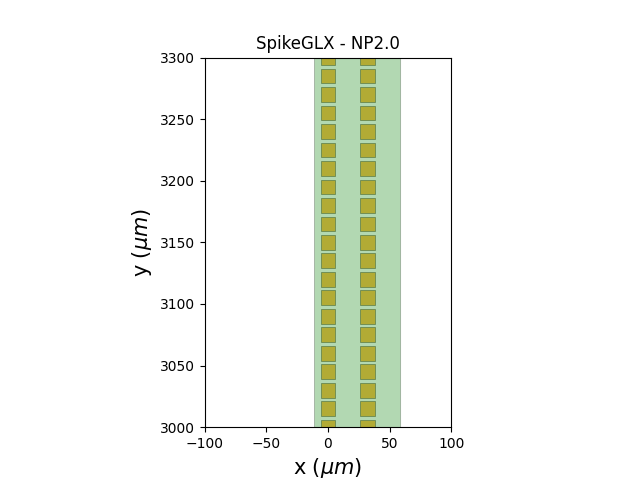

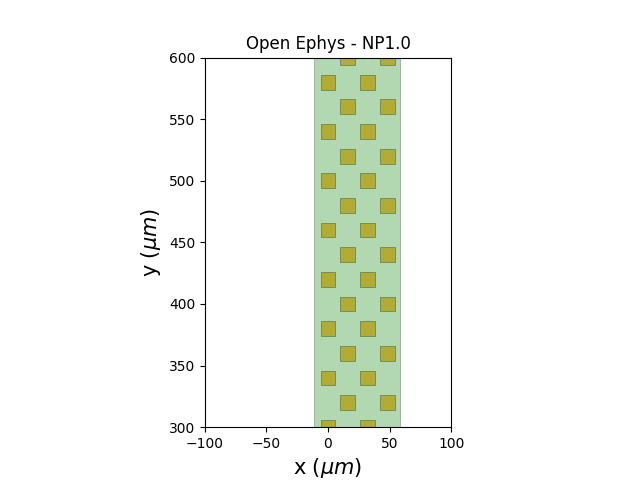

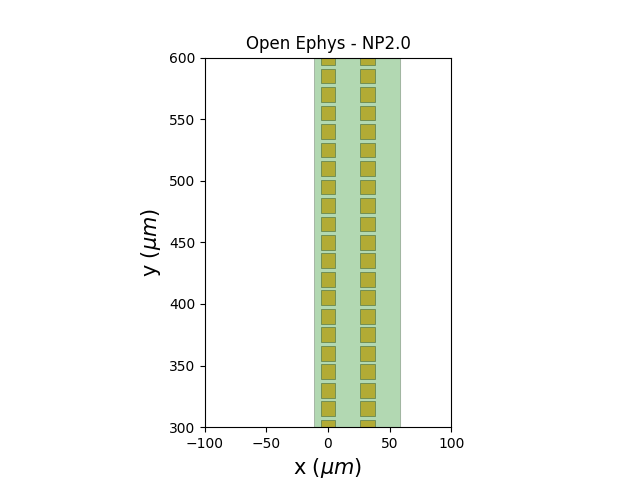

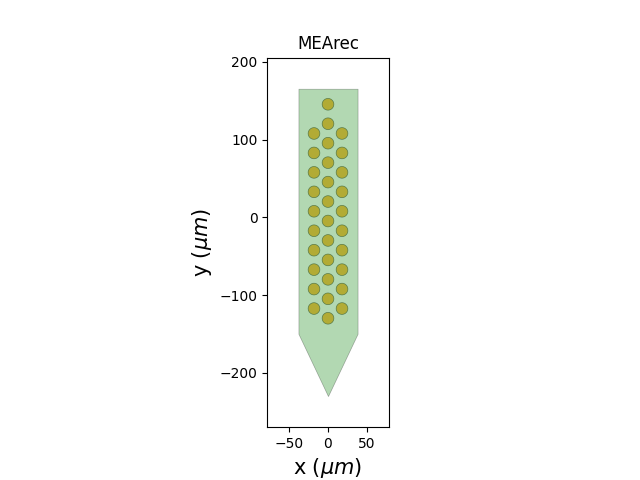

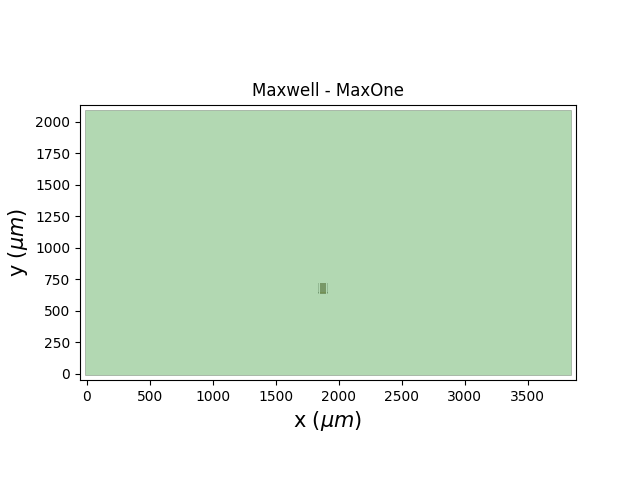

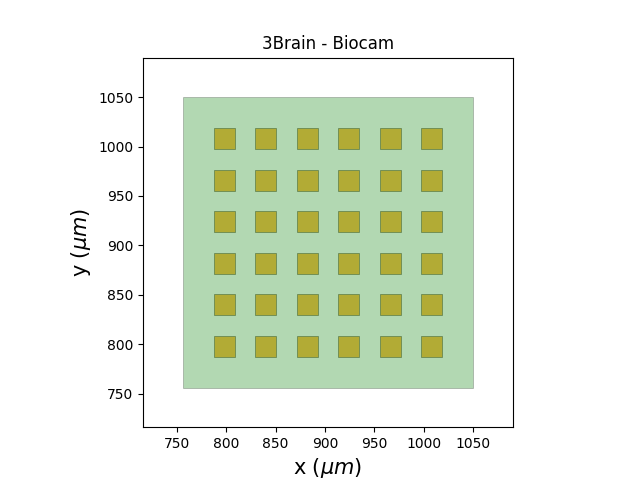

In [29]:
rec_spikeglx1 = si.read_spikeglx(spikeglx1_folder, stream_id="imec0.ap")
w = si.plot_probe_map(rec_spikeglx1)
w.ax.set_xlim(-100, 100)
w.ax.set_ylim(300, 600)
w.ax.set_title("SpikeGLX - NP1.0")



rec_spikeglx2 = si.read_spikeglx(spikeglx2_folder, stream_id="imec0.ap")
w = si.plot_probe_map(rec_spikeglx2)
w.ax.set_xlim(-100, 100)
w.ax.set_ylim(3000, 3300)
w.ax.set_title("SpikeGLX - NP2.0")


rec_oe1 = si.read_openephys(oe_npix1_folder, stream_id="0")
w = si.plot_probe_map(rec_oe1)
w.ax.set_xlim(-100, 100)
w.ax.set_ylim(300, 600)
w.ax.set_title("Open Ephys - NP1.0")


rec_oe2 = si.read_openephys(oe_npix2_folder, stream_id="0")
w = si.plot_probe_map(rec_oe2)
w.ax.set_xlim(-100, 100)
w.ax.set_ylim(300, 600)
w.ax.set_title("Open Ephys - NP2.0")


rec_mearec, _ = si.read_mearec(mearec_file)
w = si.plot_probe_map(rec_mearec)
w.ax.set_title("MEArec")


rec_maxwell = si.read_maxwell(maxwell_file)
w = si.plot_probe_map(rec_maxwell)
w.ax.set_title("Maxwell - MaxOne")

rec_biocam = si.read_biocam(threebrain_file)
w = si.plot_probe_map(rec_biocam)
w.ax.set_title("3Brain - Biocam")

## 2) Working with "segments" and "recordings"

A **RECORDING** represent an acquisition from the same session, which basically means that the underlying traces/spiking activity can be assumed to be stationary and channel ids/sampling frequency/dtype the same.
The recording also handles properties.

A recording can be made of multiple segment. A **SEGMENT** represents a piece of continuous traces, with a certain number of samples. For example, you hit play/pause multiple times for different conditions/experiments/trials. The segment implements the actual `get_traces()` function, which return the raw traces. 

The recording calls the `get_traces()` from the segments and optionally scales the traces (with gains and offsets).

In this section we'll quickly cover some utils to manipulate segments and recordings:


In [30]:
oe_folder1 = "/home/alessio/Documents/data/allen/npix-open-ephys/605068_2022-03-02_14-53-18"
oe_folder2 = "/home/alessio/Documents/data/allen/npix-open-ephys/605068_2022-02-28_17-00-14/"
oe_folder3 = "/home/alessio/Documents/data/allen/npix-open-ephys/605641_2022-03-10_15-53-45/"

In [31]:
rec_oe1 = si.read_openephys(folder_path=oe_folder1, stream_id="0")
rec_oe2 = si.read_openephys(folder_path=oe_folder2, stream_id="0")
rec_oe3 = si.read_openephys(folder_path=oe_folder3, stream_id="0")

print(rec_oe1)
print(rec_oe2)
print(rec_oe3)

OpenEphysBinaryRecordingExtractor: 384 channels - 2 segments - 30.0kHz - 1207.534s
OpenEphysBinaryRecordingExtractor: 384 channels - 1 segments - 30.0kHz - 433.985s
OpenEphysBinaryRecordingExtractor: 384 channels - 1 segments - 30.0kHz - 1707.718s


In [32]:
# internal list of segments- don't touch this!
rec_oe1._recording_segments

In [33]:
rec_oe1.add_recording_segment?

Let's assume these recordings are from the same animal/same session, so we want to concatenate them:

In [34]:
# append_recordings() appends  the segments
rec_append = si.append_recordings([rec_oe1, rec_oe2, rec_oe3])
print(rec_append)

# concatenate_recordings() concatenate the segments into a single segment
rec_concat = si.concatenate_recordings([rec_oe1, rec_oe2, rec_oe3])
print(rec_concat)

AppendSegmentRecording: 384 channels - 4 segments - 30.0kHz - 3349.237s
ConcatenateSegmentRecording: 384 channels - 1 segments - 30.0kHz - 3349.237s


**IMPORTANT**: many functions require a `segment_index` to be specified if a multi-segment object is passed!

In [35]:
print(rec_append.get_num_samples())

ValueError: Multi-segment object. Provide 'segment_index'

In [36]:
for segment_index in range(rec_append.get_num_segments()):
    print(f"Num samples segment {segment_index}: {rec_append.get_num_samples(segment_index=segment_index)}")

Num samples segment 0: 21182448
Num samples segment 1: 15043572
Num samples segment 2: 13019544
Num samples segment 3: 51231540


Also `SortingExtractor` objects can have multiple segments. For example, let's create one with 5 segments:

In [37]:
_, sort_multi = si.toy_example(num_segments=5)
print(sort_multi)

NumpySorting: 10 units - 5 segments - 30.0kHz


In [38]:
sort_multi.get_unit_spike_train(unit_id=sort_multi.unit_ids[0])

ValueError: Multi-segment object. Provide 'segment_index'

In [39]:
for segment_index in range(sort_multi.get_num_segments()):
    print(f"Num spikes segment {segment_index} unit {sort_multi.unit_ids[0]}: "
          f"{len(sort_multi.get_unit_spike_train(unit_id=sort_multi.unit_ids[0], segment_index=segment_index))}")

Num spikes segment 0 unit 0: 23
Num spikes segment 1 unit 0: 23
Num spikes segment 2 unit 0: 21
Num spikes segment 3 unit 0: 22
Num spikes segment 4 unit 0: 25


To select single segments from a recording one can:

In [40]:
rec_segments = si.select_segment_recording(rec_append, segment_indices=[1, 2])
print(rec_segments)

SelectSegmentRecording: 384 channels - 2 segments - 30.0kHz - 935.437s


Moving forward, we want all objects to support multi-semgment object, so keep them in mind when developing and always add tests for multi-segment objects!

## 3) Lazy processing explained

This is just to recap that all processing objects are **lazy** in SI, meaning that NO OPERATION is performed until the `get_traces()` method is called.

In [41]:
rec = rec_oe1
print(rec)

OpenEphysBinaryRecordingExtractor: 384 channels - 2 segments - 30.0kHz - 1207.534s


In [42]:
rec_f = si.bandpass_filter(rec)
print(rec_f)

rec_cmr = si.common_reference(rec_f, reference="local", operator="median")
print(rec_cmr)

BandpassFilterRecording: 384 channels - 2 segments - 30.0kHz - 1207.534s
CommonReferenceRecording: 384 channels - 2 segments - 30.0kHz - 1207.534s


Now all these operations will be performed on 10 seconds, 384 channels

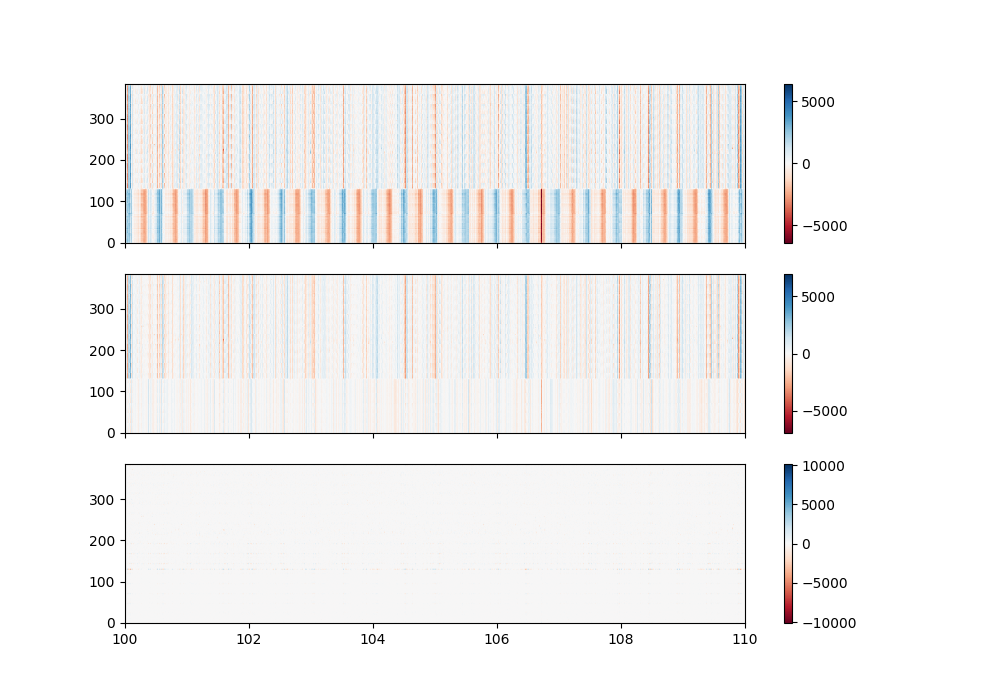

In [43]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 7), sharex=True, sharey=True)

time_range = [100, 110]
si.plot_timeseries(rec, segment_index=0, time_range=time_range, ax=axs[0])
si.plot_timeseries(rec_f, segment_index=0, time_range=time_range, ax=axs[1])
si.plot_timeseries(rec_cmr, segment_index=0, time_range=time_range, ax=axs[2])

The recording object is described by a dictionary that defines the entire chain. This dictionary is used to distribute computation tasks among jobs and to keep provenance:

In [44]:
rec_cmr.to_dict()

{'class': 'spikeinterface.toolkit.preprocessing.common_reference.CommonReferenceRecording',
 'module': 'spikeinterface',
 'kwargs': {'recording': {'class': 'spikeinterface.toolkit.preprocessing.filter.BandpassFilterRecording',
   'module': 'spikeinterface',
   'kwargs': {'recording': {'class': 'spikeinterface.extractors.neoextractors.openephys.OpenEphysBinaryRecordingExtractor',
     'module': 'spikeinterface',
     'kwargs': {'folder_path': '/home/alessio/Documents/data/allen/npix-open-ephys/605068_2022-03-02_14-53-18',
      'stream_id': '0'},
     'dumpable': True,
     'version': '0.94.0.dev0',
     'relative_paths': False,
     'annotations': {'is_filtered': False},
     'properties': {'group': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

More about these in the next tutorial!

## 4) WaveformExtractor and WaveformExtractorExtension

The `WaveformExtractor` object is the base object for all the post-processing. It is used, among others, to compute PCA projections, quality metrics, extract spike amplitudes, and more. These are all `WaveformExtractorExtension` objects. 

Let's see how they work:

In [45]:
# load some simulated MEArec data
mearec_file = "/home/alessio/Documents/data/mearec/recordings/recording_Neuropixels-128_900_int16.h5"
rec_mearec, sort_mearec = si.read_mearec(mearec_file)

In [47]:
rec_mearec

MEArecRecordingExtractor: 128 channels - 1 segments - 32.0kHz - 900.000s
  file_path: /home/alessio/Documents/data/mearec/recordings/recording_Neuropixels-128_900_int16.h5

(100.0, 110.0)

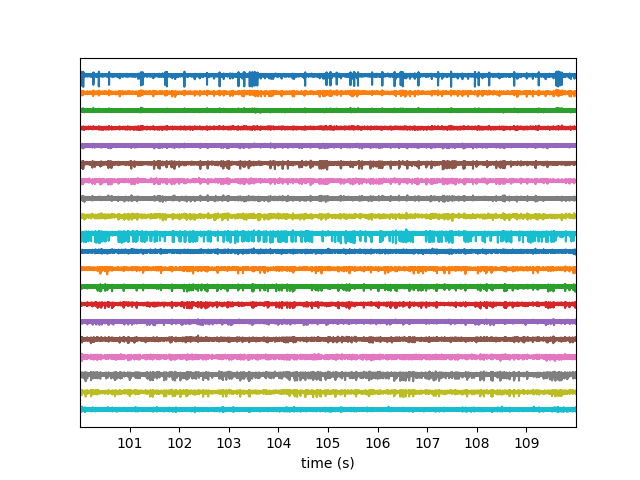

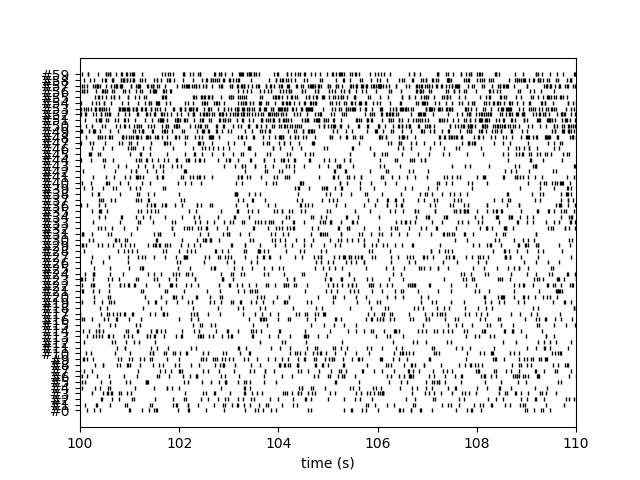

In [48]:
time_range = [100, 110]
wt = si.plot_timeseries(rec_mearec, time_range=time_range, channel_ids=rec_mearec.channel_ids[:20], mode="line")
wr = si.plot_rasters(sort_mearec)
wr.ax.set_xlim(time_range)

Waveforms can be extracted with the `si.extract_waveforms()` function and they are persistent to file. We have to specify an `output_folder` where they are stored:

In [49]:
we_mearec = si.extract_waveforms(rec_mearec, sort_mearec, folder="mearec_wf", ms_before=1., ms_after=3.,
                                 n_jobs=20, progress_bar=True, chunk_duration="1s")

extract waveforms memmap: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [00:04<00:00, 196.34it/s]


It is much faster than before (a few seconds for 15 min recording / 128 channels!).

A few notes:

- By default, only 500 spikes per unit (at most) are extracted. To get all waveforms, one can set `max_spikes_per_unit=None`
- Waveforms are currently *dense*, i.e., extracted on all channels. We are planning to extend the mechanism to directly extract sparse waveforms

In [50]:
!ls mearec_wf/

params.json  recording.json  sorting.json  templates_average.npy  waveforms


In [51]:
!ls mearec_wf/waveforms/

sampled_index_#0.npy   sampled_index_#46.npy  waveforms_#28.npy
sampled_index_#10.npy  sampled_index_#47.npy  waveforms_#29.npy
sampled_index_#11.npy  sampled_index_#48.npy  waveforms_#2.npy
sampled_index_#12.npy  sampled_index_#49.npy  waveforms_#30.npy
sampled_index_#13.npy  sampled_index_#4.npy   waveforms_#31.npy
sampled_index_#14.npy  sampled_index_#50.npy  waveforms_#32.npy
sampled_index_#15.npy  sampled_index_#51.npy  waveforms_#33.npy
sampled_index_#16.npy  sampled_index_#52.npy  waveforms_#34.npy
sampled_index_#17.npy  sampled_index_#53.npy  waveforms_#35.npy
sampled_index_#18.npy  sampled_index_#54.npy  waveforms_#36.npy
sampled_index_#19.npy  sampled_index_#55.npy  waveforms_#37.npy
sampled_index_#1.npy   sampled_index_#56.npy  waveforms_#38.npy
sampled_index_#20.npy  sampled_index_#57.npy  waveforms_#39.npy
sampled_index_#21.npy  sampled_index_#58.npy  waveforms_#3.npy
sampled_index_#22.npy  sampled_index_#59.npy  waveforms_#40.npy
sampled_index_#23.npy  sampled_index_#5.np

In [53]:
!sigui mearec_wf

![SIGUI-NOEXT](img/si-gui-no-ext.png)

Now let's compute spike amplitudes:

In [54]:
amplitudes = si.compute_spike_amplitudes(we_mearec, outputs="by_unit", n_jobs=20, progress_bar=True, 
                                         chunk_duration="1s")

extract amplitudes: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [00:04<00:00, 180.43it/s]


In [55]:
# return is multi-segment (in this case one segment)
len(amplitudes)

1

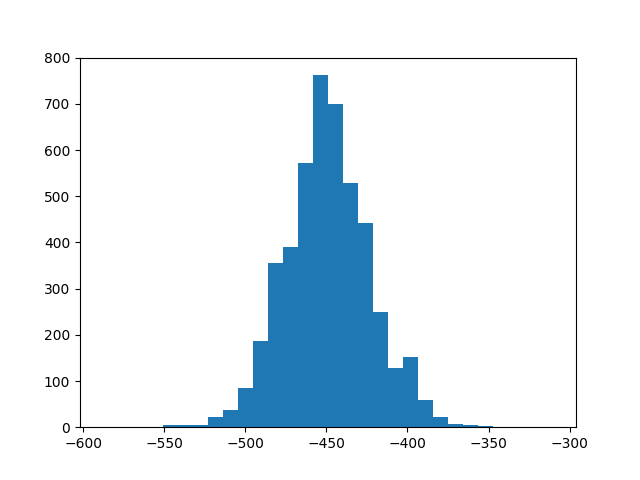

In [57]:
plt.figure()
_ = plt.hist(amplitudes[0][sort_mearec.unit_ids[0]], bins=30)

In [58]:
!ls mearec_wf/

params.json	sorting.json	  templates_average.npy  waveforms
recording.json	spike_amplitudes  templates_std.npy


Now there is a new `spike_amplitudes` folder with the computed amplitudes.

In [59]:
qm = si.compute_quality_metrics(we_mearec)
qm

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_rate,isi_violations_count,amplitude_cutoff
#0,4723,5.247778,1.0,60.589794,0.0,0.0,0,0.000518
#1,4689,5.210000,1.0,20.306835,0.0,0.0,0,0.013235
#2,3959,4.398889,1.0,29.906319,0.0,0.0,0,0.008044
#3,4950,5.500000,1.0,23.495262,0.0,0.0,0,0.000518
#4,3700,4.111111,1.0,25.681925,0.0,0.0,0,0.006867
#5,3750,4.166667,1.0,33.901447,0.0,0.0,0,0.000519
#6,4528,5.031111,1.0,41.746151,0.0,0.0,0,0.000518
#7,4277,4.752222,1.0,11.569833,0.0,0.0,0,0.000518
#8,5700,6.333333,1.0,18.094810,0.0,0.0,0,0.000518
#9,5317,5.907778,1.0,10.989223,0.0,0.0,0,0.013224


Waveform extensions are objects that add information to the `WaveformExtractor` object. We can check which extensions are available with:

In [61]:
we_mearec.get_available_extension_names()

['spike_amplitudes', 'quality_metrics']

and load the respective object:

In [62]:
amp_object = we_mearec.load_extension("spike_amplitudes")
qm_object = we_mearec.load_extension("quality_metrics")

print(amp_object)
print(qm_object)

Some nice features of the extension classes:

1. If we reload the `WaveformExtractor` from folder, extensions are loaded too
2. If we `select_units()` from the `WaveformExtractor` object (e.g. autocuration), extension also only copy the data relative to the selected units
3. Extensions add new widgets to the `spikeinterface-gui`

In [64]:
# 1. reload waveforms and extension
we_loaded = si.WaveformExtractor.load_from_folder("mearec_wf/")
we_loaded.get_available_extension_names()

['spike_amplitudes', 'quality_metrics']

In [67]:
# 2. select units from waveform extractor
we_selected = we_loaded.select_units(sort_mearec.unit_ids[::10], new_folder="mearec_wf_selected")
qm_selected = we_selected.load_extension("quality_metrics")
qm_selected.get_metrics()

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_rate,isi_violations_count,amplitude_cutoff
#0,4723,5.247778,1.0,60.589794,0.0,0.0,0,0.000518
#10,5133,5.703333,1.0,26.031652,0.0,0.0,0,0.000518
#20,4370,4.855556,1.0,17.501657,0.0,0.0,0,0.000518
#30,4005,4.450000,1.0,13.981846,0.0,0.0,0,0.000518
#40,4606,5.117778,1.0,12.018240,0.0,0.0,0,0.000518
#50,11086,12.317778,1.0,20.704182,0.0,0.0,0,0.000522


In [68]:
# 3. run si-gui
!sigui mearec_wf_selected/

![SIGUI-EXT](img/si-gui-ext.png)

## 5) Parallelization - working with job tools

As the number of channels and overall number of recordings grows, it is essential that we make things fast.

In the `core` module of SpikeInterface we have some tools to efficiently parallelize over time chunks. 

We use the `ProcessPoolExecutor` class to distribute tasks across jobs. In order to implement a new parallel function we need:

- an `init` function: function run when the worker is initialized. Normally used to set up a context for the worker. For example, since objects need to be picklable, we can re-instantiate a recording/sorting object from dict
- a `process` function: this function gets the segment_index, start_frame, and end_frame and does the actual computation
- `**job_kwargs`: these arguments control the number of jobs and chunk sizes

In [69]:
from spikeinterface.core.job_tools import _shared_job_kwargs_doc
print(_shared_job_kwargs_doc)

**job_kwargs: keyword arguments for parallel processing:
            * chunk_size or chunk_memory, or total_memory
                - chunk_size: int
                    number of samples per chunk
                - chunk_memory: str
                    Memory usage for each job (e.g. '100M', '1G'
                - total_memory: str
                    Total memory usage (e.g. '500M', '2G')
                - chunk_duration : str or float or None
                    Chunk duration in s if float or with units if str (e.g. '1s', '500ms')
            * n_jobs: int
                Number of jobs to use. With -1 the number of jobs is the same as number of cores
            * progress_bar: bool
                If True, a progress bar is printed
    


Let's try to create a parallel function to compute the peak to peak of the entire traces. Note that this computation cannot be done just by loading the traces in memory, since the RAM would probably not be enough.

Note that this approach will natively work with multi-segment objects!

In [70]:
from spikeinterface.core.job_tools import ensure_n_jobs, ChunkRecordingExecutor

In [71]:
rec = rec_oe1
print(rec)

OpenEphysBinaryRecordingExtractor: 384 channels - 2 segments - 30.0kHz - 1207.534s


In [72]:
# use SI job tools for blocks!
def get_recording_ptp(recording: si.BaseRecording, return_scaled=False, verbose=False, **job_kwargs):
    """
    Write Recording with Audio compression (flac, mp3, aac)

    Parameters
    ----------
    recording : si.BaseRecording
        The input recording
    output_folder : _type_
        The folder where the compressed data is saved
    """
    n_jobs = ensure_n_jobs(recording, n_jobs=job_kwargs.get('n_jobs', 1))
    
    # use executor (loop or workers)
    func = _compute_ptp_chunk
    init_func = _init_ptp_worker
    if n_jobs == 1:
        init_args = (recording, return_scaled)
    else:
        init_args = (recording.to_dict(), return_scaled)

    executor = ChunkRecordingExecutor(recording, func, init_func, init_args, verbose=verbose,
                                      handle_returns=True, job_name='compute_ptp', **job_kwargs)
    min_maxs = executor.run()
    min_maxs = np.array(min_maxs)

    min_global = np.min(min_maxs[:, 0])
    max_global = np.max(min_maxs[:, 1])
    
    ptp = max_global - min_global
    
    return ptp
    

# used by write_binary_recording + ChunkRecordingExecutor
def _init_ptp_worker(recording, return_scaled):
    # create a local dict per worker
    worker_ctx = {}
    if isinstance(recording, dict):
        from spikeinterface.core import load_extractor
        worker_ctx['recording'] = load_extractor(recording)
    else:
        worker_ctx['recording'] = recording
    worker_ctx['return_scaled'] = return_scaled
    
    return worker_ctx


# used by write_binary_recording + ChunkRecordingExecutor
def _compute_ptp_chunk(segment_index, start_frame, end_frame, worker_ctx):
    # recover variables of the worker
    recording = worker_ctx['recording']
    return_scaled = worker_ctx['return_scaled'] 
    traces = recording.get_traces(segment_index=segment_index, start_frame=start_frame,
                                  end_frame=end_frame, return_scaled=return_scaled)
    
    return [np.min(traces), np.max(traces)]


In [73]:
# 1 job
n_jobs_list = [1, 4, 8]

for n_jobs in n_jobs_list:
    print(f"N jobs: {n_jobs}")
    t_start = time.perf_counter()
    ptp = get_recording_ptp(rec, 
                            progress_bar=True, n_jobs=n_jobs, chunk_duration="1s")
    ptp_uV = get_recording_ptp(rec, return_scaled=True, 
                               progress_bar=True, n_jobs=n_jobs, chunk_duration="1s")
    t_stop = time.perf_counter()
    elapsed_time = np.round(t_stop - t_start, 2)

    print(f"PTP {n_jobs} job: {ptp} --> {ptp_uV}uV -- elapsed time: {elapsed_time}s")

N jobs: 1


compute_ptp: 100%|############################################################################################################################################################################################################################| 1209/1209 [00:26<00:00, 46.49it/s]

PTP 1 job: 12816 --> 2499.119873046875uV -- elapsed time: 54.03s
N jobs: 4



compute_ptp: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1209/1209 [00:13<00:00, 91.69it/s]


PTP 4 job: 12816 --> 2499.119873046875uV -- elapsed time: 17.15s
N jobs: 8


compute_ptp: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1209/1209 [00:13<00:00, 91.22it/s]


PTP 8 job: 12816 --> 2499.119873046875uV -- elapsed time: 15.64s


There is some overhead in using more jobs, so for this trivial processing step the performance increase is not dramatic. Let's check for something a bit more computationally intense:

In [74]:
from spikeinterface.sortingcomponents.peak_detection import detect_peaks

for n_jobs in n_jobs_list:
    print(f"N jobs: {n_jobs}")
    t_start = time.perf_counter()
    peaks = detect_peaks(rec, 
                         progress_bar=True, n_jobs=n_jobs, chunk_duration="1s")
    t_stop = time.perf_counter()
    elapsed_time = np.round(t_stop - t_start, 2)

    print(f"Peak detection {n_jobs} job -- elapsed time: {elapsed_time}s")

N jobs: 1


detect peaks: 100%|###########################################################################################################################################################################################################################| 1209/1209 [00:35<00:00, 33.94it/s]


Peak detection 1 job -- elapsed time: 42.53s
N jobs: 4


detect peaks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1209/1209 [00:11<00:00, 104.36it/s]


Peak detection 4 job -- elapsed time: 17.1s
N jobs: 8


detect peaks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1209/1209 [00:09<00:00, 132.99it/s]


Peak detection 8 job -- elapsed time: 14.34s


It is convenient to pre-define the job kwargs and pass them to all parallelized functions:

In [75]:
job_kwargs = {"n_jobs": 20, "progress_bar": True, "chunk_duration": "1s"}

## 6)  Save formats: binary  / zarr / memory


The `save()` function allows you to cache a SpikeInterface object  and use it for later. Different formats are supported:

- recording: 
    * binary
    * zarr (NEW)
    * memory
    
- sorting:
    * npz
    * memory

The "memory" option stores the traces/spikes in memory. This option is designed for large computational resources to minimize I/O access, but it's still under investigation.


### Saving recordings

In [76]:
# save to folder (binary)
rec_bin = rec.save(folder="binary_format", **job_kwargs)
rec_bin

write_binary_recording with n_jobs 20  chunk_size 30000


write_binary_recording: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1209/1209 [00:13<00:00, 88.15it/s]


BinaryRecordingExtractor: 384 channels - 2 segments - 30.0kHz - 1207.534s
  file_paths: ['/home/alessio/Documents/codes/spike_sorting/spikeinterface/spiketutorials/Advanced_Tutorial_SI_0.94_Apr2021/binary_format/traces_cached_seg0.raw', '/home/alessio/Documents/codes/spike_sorting/spikeinterface/spiketutorials/Advanced_Tutorial_SI_0.94_Apr2021/binary_format/traces_cached_seg1.raw']

In [77]:
!ls binary_format/

cached.json  properties       traces_cached_seg0.raw
probe.json   provenance.json  traces_cached_seg1.raw


In [79]:
# save to ZARR (and compress!!!)
rec_zarr_default = rec.save(format="zarr", zarr_path="zarr_format_default.zarr", 
                            **job_kwargs)
rec_zarr_default

Using default zarr compressor: Blosc(cname='zstd', clevel=5, shuffle=BITSHUFFLE, blocksize=0). To use a different compressor, use the 'compressor' argument
write_zarr_recording with n_jobs 20  chunk_size 30000


write_zarr_recording: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1209/1209 [00:31<00:00, 38.65it/s]


Skipping field contact_plane_axes: only 1D and 2D arrays can be serialized


ZarrRecordingExtractor: 384 channels - 2 segments - 30.0kHz - 1207.534s

The `zarr_format_default.zarr` is a zarr group, so it can also be opened with the `zarr` API

In [80]:
!ls zarr_format_default.zarr

channel_ids  properties  traces_seg0  traces_seg1  t_starts


In [81]:
print("CR default:", rec_zarr_default.get_annotation("compression_ratio"))

CR default: 1.6191105740562772


In [82]:
# define a different compressor (higher compression level)
from numcodecs import Blosc

custom_compressor = Blosc(cname="zstd", clevel=9, shuffle=Blosc.BITSHUFFLE)

rec_zarr_custom = rec.save(format="zarr", zarr_path="zarr_format_custom.zarr", 
                           compressor=custom_compressor, **job_kwargs)
print("CR custom:", rec_zarr_custom.get_annotation("compression_ratio"))

write_zarr_recording with n_jobs 20  chunk_size 30000


write_zarr_recording: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1209/1209 [03:05<00:00,  6.51it/s]


Skipping field contact_plane_axes: only 1D and 2D arrays can be serialized
CR custom: 1.6707982045762886


In [83]:
# to memory (numpy recording)
rec_one_seg = rec.select_segments(segment_indices=0)
rec_sub = rec_one_seg.frame_slice(start_frame=0, end_frame=int(120*rec.get_sampling_frequency()))

In [84]:
rec_mem = rec_sub.save(format="memory", **job_kwargs)

write_memory_recording: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 281.42it/s]


In [85]:
rec_mem

NumpyRecording: 384 channels - 1 segments - 30.0kHz - 120.000s

In [87]:
# traces extraction speed
fs = rec.get_sampling_frequency()
start_time = 20
end_time = 50
start_frame = int(start_time*fs)
end_frame = int(end_time*fs)
segment_index = 0
duration = end_time - start_time

t_start = time.perf_counter()
# here we need copy because otherwise it's a memmap
traces_bin = rec_bin.get_traces(start_frame=start_frame,
                                end_frame=end_frame,
                                segment_index=segment_index).copy()
t_stop = time.perf_counter()
elapsed_bin = np.round(t_stop - t_start, 2)
print(f"Time to extract {duration}s traces BINARY: {elapsed_bin}s")


t_start = time.perf_counter()
traces_zarr_def = rec_zarr_default.get_traces(start_frame=start_frame,
                                              end_frame=end_frame,
                                              segment_index=segment_index)
t_stop = time.perf_counter()
elapsed_zarr_def = np.round(t_stop - t_start, 2)
print(f"Time to extract {duration}s traces ZARR default: {elapsed_zarr_def}s")

t_start = time.perf_counter()
traces_zarr_custom = rec_zarr_custom.get_traces(start_frame=start_frame,
                                                end_frame=end_frame,
                                                segment_index=segment_index)
t_stop = time.perf_counter()
elapsed_zarr_custom = np.round(t_stop - t_start, 2)
print(f"Time to extract {duration}s traces ZARR custom: {elapsed_zarr_custom}s")

t_start = time.perf_counter()
traces_mem = rec_mem.get_traces(start_frame=start_frame,
                                end_frame=end_frame,
                                segment_index=segment_index)
t_stop = time.perf_counter()
elapsed_mem = np.round(t_stop - t_start, 2)
print(f"Time to extract {duration}s traces MEMORY: {elapsed_mem}s")

Time to extract 30s traces BINARY: 0.07s
Time to extract 30s traces ZARR default: 0.31s
Time to extract 30s traces ZARR custom: 0.41s
Time to extract 30s traces MEMORY: 0.0s


### Saving sortings

In [88]:
# save to folder (npz)
sort_npz = sort_mearec.save(folder="npz_fomat")
sort_npz

NpzSortingExtractor: 60 units - 1 segments - 32.0kHz
  file_path: /home/alessio/Documents/codes/spike_sorting/spikeinterface/spiketutorials/Advanced_Tutorial_SI_0.94_Apr2021/npz_fomat/sorting_cached.npz

In [89]:
# to memory
sort_mem = sort_mearec.save(format="memory")
sort_mem

NumpySorting: 60 units - 1 segments - 32.0kHz